In [ ]:
!pip install torch

In [ ]:
!pip install jupyter
!pip install tensorflow 

  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.2
    Uninstalling numpy-1.21.2:
      Successfully uninstalled numpy-1.21.2


In [ ]:
!pip install numpy --upgrade

In [ ]:
import os
import numpy as np
import cv2
import random
import seaborn as sns
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import torch
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Dropout, add, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
os.listdir(r'C:\Users\user\Downloads\Les')

['.ipynb_checkpoints',
 'annotations_prepped_test',
 'annotations_prepped_train',
 'images_prepped_test',
 'images_prepped_train',
 'LesCV_Project_Final_2_Acc42%.ipynb',
 'LesCV_Project_Final_3_.ipynb',
 'LesCV_Project_Final_3_Acc67%-Copy1.ipynb',
 'LesCV_Project_Final_3_Acc67%-Copy2.ipynb',
 'LesCV_Project_Final_3_Acc67%.ipynb',
 'LesCV_project_try_3.ipynb',
 'LesCV_Week_2.ipynb',
 'snapshots',
 'Untitled.ipynb',
 'vegetable dataset',
 'VGG_Implementation.ipynb',
 '[Project_Final_].ipynb']

# Train Data Path

In [ ]:
img_path = "./images_prepped_train/"
annot_path = "./annotations_prepped_train/"
list_img = np.sort(next(os.walk(img_path), (None, None, []))[2])
list_annot = np.sort(next(os.walk(annot_path), (None, None, []))[2])  
len(list_img), len(list_annot)

(367, 367)

In [ ]:
list_img[2], list_annot[2]

('0001TP_006750.png', '0001TP_006750.png')

# Test Data Path

In [ ]:
img_test_path = "./images_prepped_test/"
annot_test_path = "./annotations_prepped_test/"
list_img_test = np.sort(next(os.walk(img_test_path), (None, None, []))[2])
list_annot_test = np.sort(next(os.walk(annot_test_path), (None, None, []))[2])  
len(list_img_test), len(list_annot_test)

(101, 101)

# Load Train Data

In [ ]:
# All train image
for list_img in os.listdir(img_path):
    imgg = cv2.imread(os.path.join(img_path, list_img), 0)
imgg.shape

(360, 480)

In [ ]:
# ======= RESHAPE IMAGES TRAIN DATA==========
images = []
for list_img in os.listdir(img_path):
    img = cv2.imread(os.path.join(img_path, list_img), 0)
    if img is not None:
#         img = cv2.resize(img, (720, 720))
        img = cv2.resize(img, (256, 256))
        images.append(img)
        
        
images = np.array(images)
images.shape

(367, 256, 256)

In [ ]:
images.shape

(367, 256, 256)

In [ ]:
# All train annotation
for list_annot in os.listdir(annot_path):
    all_msk = cv2.imread(os.path.join(annot_path, list_annot), 0)
all_msk.shape

(360, 480)

In [ ]:
# ======= RESHAPE ANNOTATION TRAIN DATA ==========
seg_masks = []

for list_annot in os.listdir(annot_path):
    msk = cv2.imread(os.path.join(annot_path, list_annot), 0)
    if msk is not None:
        msk = cv2.resize(msk, (256, 256))
        seg_masks.append(msk)
        
seg_masks = np.array(seg_masks)
seg_masks.shape

(367, 256, 256)

# Load Test Data

In [ ]:
# ======= RESHAPE IMAGES TEST DATA ==========

test_images = []

for list_img_test in os.listdir(img_test_path):
    img_test = cv2.imread(os.path.join(img_test_path, list_img_test), 0)
    if img_test is not None:
        img_test = cv2.resize(img_test, (256, 256))
        test_images.append(img_test)
        
test_images = np.array(test_images)
test_images.shape

(101, 256, 256)

In [ ]:
test_images.shape

(101, 256, 256)

In [ ]:
# ======= RESHAPE ANNOTATION TEST DATA ==========

test_label_images = []

for list_annot_test in os.listdir(annot_test_path):
    msk_test = cv2.imread(os.path.join(annot_test_path, list_annot_test), 0)
    if msk_test is not None:
        msk_test = cv2.resize(msk_test, (256, 256))
        test_label_images.append(msk_test)
        
test_label_images = np.array(test_label_images)
test_label_images.shape

(101, 256, 256)

In [ ]:
np.unique(test_label_images)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=uint8)

# Explore Data

In [ ]:
def get_data(data_dir):
    no = 0
    for img in os.listdir(data_dir):
        no = no + 1
        print("No Image : " + str(no) + "-" + img)
        try:
            img_arr = cv2.imread(data_dir + img, cv2.IMREAD_UNCHANGED) # Search for classes
            dimensions = img_arr.shape # Search for dimension
            print('Class :', np.unique(img_arr))
            print('Image Dimension    : ', dimensions)

        except Exception as e:
            print(e)

In [ ]:
get_data("./annotations_prepped_train/")

No Image : 1-.ipynb_checkpoints
'NoneType' object has no attribute 'shape'
No Image : 2-0001TP_006690.png
Class : [ 0  1  2  3  4  5  6  8  9 11]
Image Dimension    :  (360, 480)
No Image : 3-0001TP_006720.png
Class : [ 0  1  2  3  4  5  6  8  9 11]
Image Dimension    :  (360, 480)
No Image : 4-0001TP_006750.png
Class : [ 0  1  2  3  4  5  6  8  9 11]
Image Dimension    :  (360, 480)
No Image : 5-0001TP_006780.png
Class : [ 0  1  2  3  4  5  6  8  9 11]
Image Dimension    :  (360, 480)
No Image : 6-0001TP_006810.png
Class : [ 0  1  2  3  4  5  6  8  9 10 11]
Image Dimension    :  (360, 480)
No Image : 7-0001TP_006840.png
Class : [ 0  1  2  3  4  5  6  8  9 10 11]
Image Dimension    :  (360, 480)
No Image : 8-0001TP_006870.png
Class : [ 0  1  2  3  4  5  6  8  9 10 11]
Image Dimension    :  (360, 480)
No Image : 9-0001TP_006900.png
Class : [ 0  1  2  3  4  5  6  8  9 11]
Image Dimension    :  (360, 480)
No Image : 10-0001TP_006930.png
Class : [ 0  1  2  3  4  5  6  8  9 10 11]
Image Dim

In [ ]:
print("height =", images.shape[0])
print("width =", images.shape[1])
print("channels =", images.shape[2])


height = 367
width = 256
channels = 256


In [ ]:
# Image values
print("Image Unique Values: ")
print(np.unique(images))

Image Unique Values: 
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 

In [ ]:
# Annotation values
print("Annotation Class: ")
print(np.unique(seg_masks))

Annotation Class: 
[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [ ]:
print("Features in img_annot number 100:", np.unique(seg_masks[1]))
print("Features in img_annot number 280:", np.unique(seg_masks[310]))

Features in img_annot number 100: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Features in img_annot number 280: [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [ ]:
def get_colored_segmentation_image(images, seg_masks, colors,
                                    n_classes):
    seg_ = np.zeros_like(seg_masks)

    for c in range(n_classes):
        seg_[:, :, 0] += ((seg_masks[:, :, 0] == c) * (colors[c][0])).astype('uint8')        
        seg_[:, :, 1] += ((seg_masks[:, :, 0] == c) * (colors[c][1])).astype('uint8')
        seg_[:, :, 2] += ((seg_masks[:, :, 0] == c) * (colors[c][2])).astype('uint8')
    return images, seg_

class_colors = [(random.randint(0, 255), #RGB COLOR
                 random.randint(0, 255), 
                 random.randint(0, 255)) for _ in range(2000)]

In [ ]:
class_colors

[(238, 49, 62),
 (238, 180, 180),
 (143, 237, 217),
 (72, 214, 10),
 (178, 109, 187),
 (117, 223, 208),
 (171, 141, 159),
 (168, 237, 102),
 (26, 89, 191),
 (217, 192, 254),
 (122, 183, 247),
 (232, 120, 63),
 (195, 236, 248),
 (169, 240, 78),
 (16, 94, 240),
 (146, 104, 114),
 (98, 39, 254),
 (205, 84, 105),
 (88, 118, 25),
 (144, 135, 147),
 (175, 182, 213),
 (135, 198, 166),
 (54, 99, 149),
 (35, 177, 2),
 (163, 172, 63),
 (230, 230, 111),
 (152, 114, 192),
 (93, 175, 217),
 (119, 68, 118),
 (222, 166, 116),
 (209, 75, 196),
 (131, 230, 98),
 (233, 193, 208),
 (140, 108, 95),
 (10, 106, 207),
 (193, 214, 208),
 (220, 240, 103),
 (81, 52, 80),
 (205, 63, 23),
 (233, 1, 221),
 (255, 64, 83),
 (169, 249, 10),
 (144, 151, 59),
 (235, 101, 139),
 (130, 188, 73),
 (81, 206, 34),
 (55, 147, 218),
 (119, 45, 79),
 (94, 137, 32),
 (131, 73, 84),
 (17, 131, 11),
 (61, 105, 196),
 (121, 29, 184),
 (31, 55, 200),
 (132, 102, 51),
 (214, 8, 129),
 (102, 106, 176),
 (222, 190, 39),
 (53, 199, 232

In [ ]:
images, seg_ = get_colored_segmentation_image(
                                        images, seg_masks, colors=class_colors,
                                        n_classes=12)

In [ ]:
seg_.shape

(367, 256, 256)

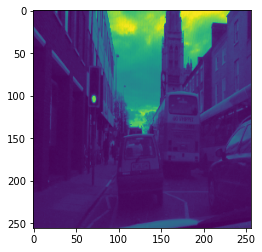

In [ ]:
plt.imshow(images[0])
plt.show()

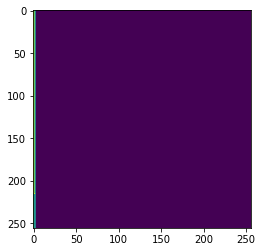

In [ ]:
plt.imshow(seg_[0])
plt.show()

In [ ]:
from scipy.stats import itemfreq

list_ = []

for i in tqdm(list_annot):
    annot = cv2.imread(annot_path + i)
    freq = itemfreq(annot)
    list_.append(dict(freq))
    
len(list_)

  0%|                                                                                           | 0/16 [00:00<?, ?it/s]<ipython-input-29-a783b8069aef>:7: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  freq = itemfreq(annot)
100%|████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 2004.39it/s]


16

In [ ]:
sum_dict = dict.fromkeys(set().union(*list_), 0)

In [ ]:
for d in list_:
    for k in d.keys():
        sum_dict[k] += d[k]

In [ ]:
print(sum_dict)

{None: 16}
